In [1]:
import warnings
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams 
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from sklearn.preprocessing import MinMaxScaler, normalize, Normalizer
from sklearn.feature_selection import (RFE, mutual_info_regression)
from sklearn.linear_model import (BayesianRidge, ElasticNet, Lasso, LinearRegression, 
                                  Ridge, SGDRegressor)
from sklearn.ensemble import (RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor)

In [2]:
%matplotlib inline
sns.set(style="darkgrid", color_codes=True)
plt.style.use('dark_background')
warnings.filterwarnings('ignore')

In [3]:
houses = pd.read_csv('kc_house_data.csv')
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [4]:
house = houses.drop(['date', 'id'], axis=1)
house.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
# First extract the target variable which is our House prices
Y = house.price.values

# Drop price from the house dataframe and create a matrix out of the house data
house = house.drop(['price'], axis=1)
X = house.as_matrix()

# Store the column/feature names into a list "colnames"
colnames = house.columns

In [6]:
# Define dictionary to store our rankings
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [7]:
# Using Linear Regression
lr = LinearRegression(normalize=True)
lr.fit(X,Y)

#stop the search when only the last feature is left
rfe = RFE(lr, n_features_to_select=1, verbose =3 )
rfe.fit(X,Y)

ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

print('finished')

Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
finished


In [8]:
mi_reg = pd.Series(mutual_info_regression(X, Y),
                   index=colnames)

ranks['mutual_info_reg'] = ranking(np.abs(mi_reg.values), colnames)
print('finished')

finished


In [9]:
# Finally let's run our Selection Stability method with Randomized Lasso
bayesianr = BayesianRidge()
bayesianr.fit(X, Y)
ranks['BayesianRidge'] = ranking(np.abs(bayesianr.coef_), colnames)

# Finally let's run our Selection Stability method with Randomized Lasso
enetcv = ElasticNet()
enetcv.fit(X, Y)
ranks['ElasticNet'] = ranking(np.abs(enetcv.coef_), colnames)

# Finally let's run our Selection Stability method with Randomized Lasso
sgdr = SGDRegressor()
sgdr.fit(X, Y)
ranks['SGDRegressor'] = ranking(np.abs(sgdr.coef_), colnames)

# Using Linear Regression
lr = LinearRegression(normalize=True)
lr.fit(X,Y)
ranks["LinReg"] = ranking(np.abs(lr.coef_), colnames)

# Using Ridge 
ridge = Ridge(alpha=7)
ridge.fit(X,Y)
ranks['Ridge'] = ranking(np.abs(ridge.coef_), colnames)

# Using Lasso
lasso = Lasso(alpha=.05)
lasso.fit(X, Y)
ranks["Lasso"] = ranking(np.abs(lasso.coef_), colnames)

In [10]:
rf = RandomForestRegressor(n_estimators=50, verbose=0)
rf.fit(X,Y)
ranks["RFR"] = ranking(rf.feature_importances_, colnames);

ada = AdaBoostRegressor(n_estimators=50)
ada.fit(X,Y)
ranks["ADAB"] = ranking(ada.feature_importances_, colnames);

etr = ExtraTreesRegressor(n_estimators=50, verbose=0)
etr.fit(X,Y)
ranks["ETR"] = ranking(etr.feature_importances_, colnames);

In [11]:
# Create empty dictionary to store the mean value calculated from all the scores
r = {}
for name in colnames:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)

In [12]:
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")

In [13]:
ranks_df = pd.DataFrame(ranks)
ranks_df['std_mean'] = ranks_df.Mean / ranks_df.Mean.sum()
ranks_df

,RFE,mutual_info_reg,BayesianRidge,ElasticNet,SGDRegressor,LinReg,Ridge,Lasso,RFR,ADAB,ETR,Mean,std_mean
bedrooms,0.59,0.17,0.06,0.42,0.00,0.06,0.06,0.06,0.00,0.04,0.01,0.13,0.033248
bathrooms,0.71,0.48,0.07,0.26,0.00,0.07,0.07,0.07,0.02,0.04,0.16,0.18,0.046036
sqft_living,0.35,0.84,0.00,0.00,0.21,0.00,0.00,0.00,0.83,1.00,0.82,0.37,0.094629
sqft_lot,0.00,0.12,0.00,0.00,0.27,0.00,0.00,0.00,0.04,0.03,0.03,0.04,0.010230
floors,0.47,0.16,0.01,0.21,0.01,0.01,0.01,0.01,0.00,0.01,0.01,0.08,0.020460
waterfront,1.00,0.00,0.96,0.15,0.00,0.97,0.94,0.97,0.09,0.08,0.15,0.48,0.122762
view,0.76,0.10,0.09,0.65,0.02,0.09,0.09,0.09,0.03,0.03,0.19,0.19,0.048593
condition,0.65,0.00,0.04,0.15,0.01,0.04,0.04,0.04,0.00,0.00,0.02,0.09,0.023018
grade,0.88,0.81,0.16,1.00,0.01,0.16,0.16,0.16,1.00,0.48,1.00,0.53,0.135550
sqft_above,0.29,0.62,0.00,0.00,0.39,0.00,0.00,0.00,0.06,0.14,0.23,0.16,0.040921


In [14]:
# Cumulative importances
cumulative_importances = np.cumsum(ranks_df.std_mean.sort_values(ascending=False).values)
# list of x locations for plotting
x_values = list(range(len(ranks_df.std_mean.values)))
sorted_features = ranks_df.std_mean.sort_values(ascending=False).index.values
sorted_importances = ranks_df.std_mean.sort_values(ascending=False).values

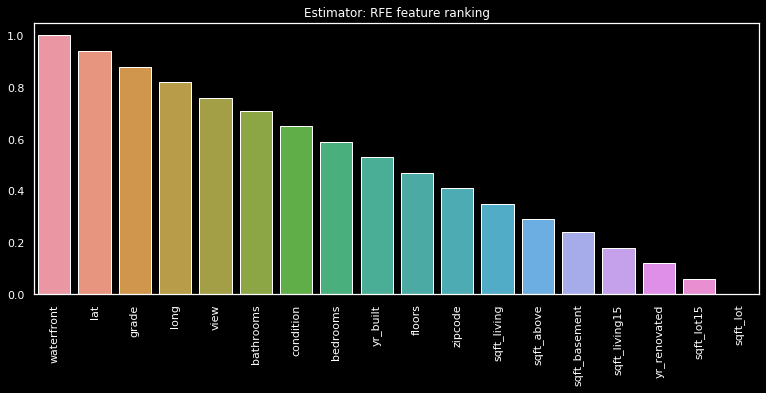

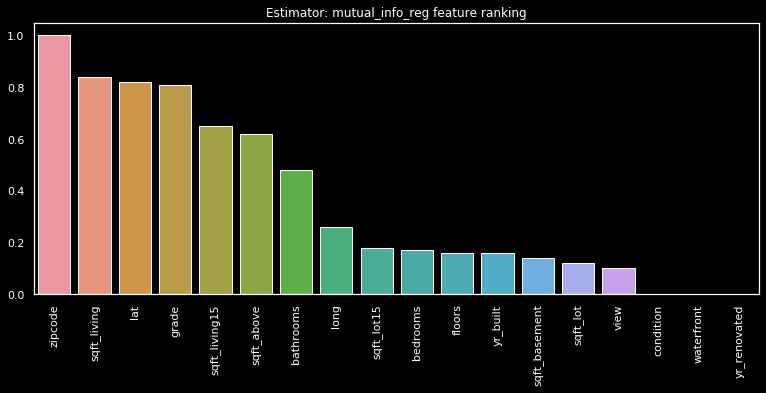

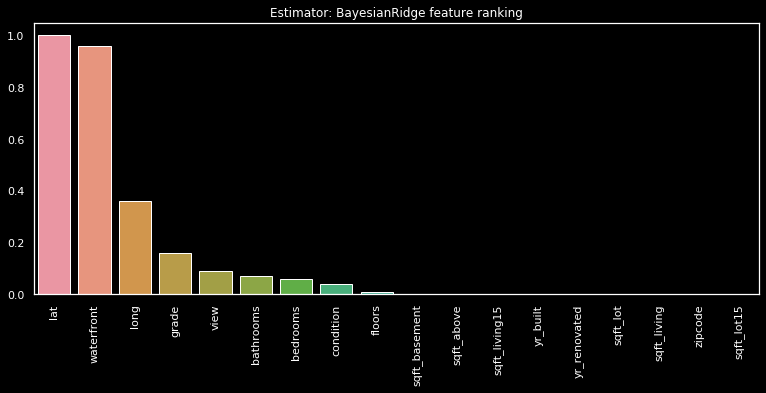

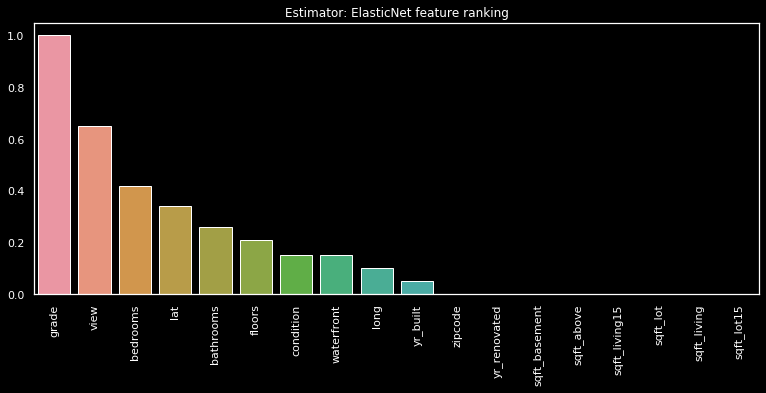

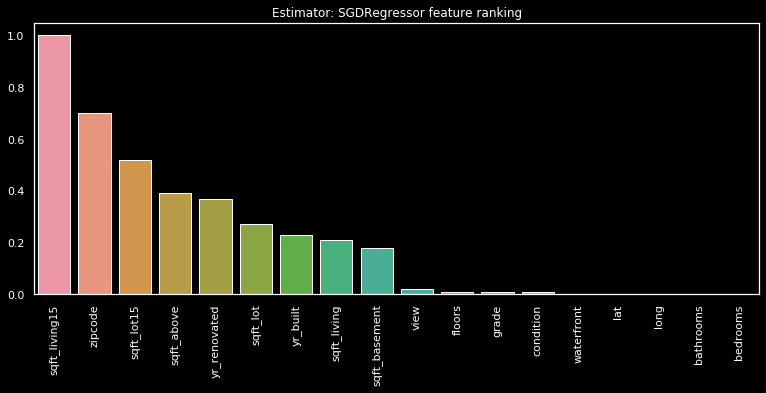

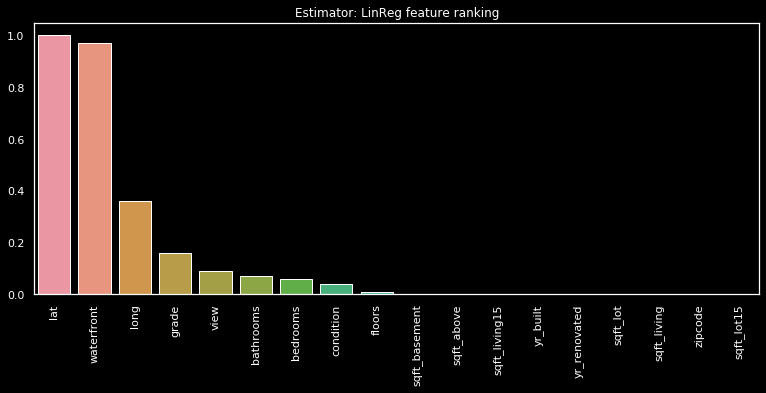

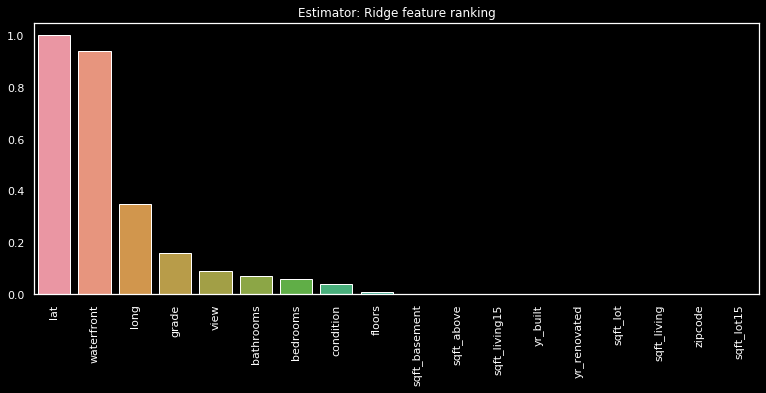

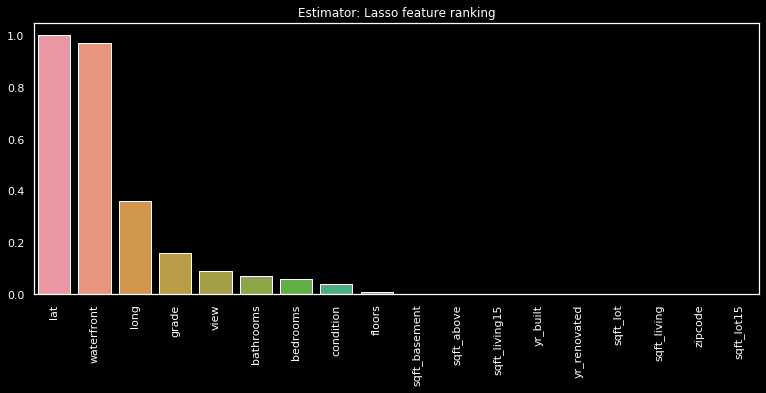

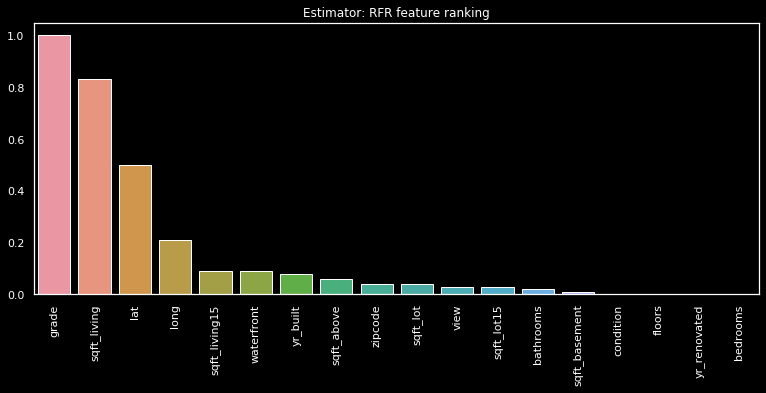

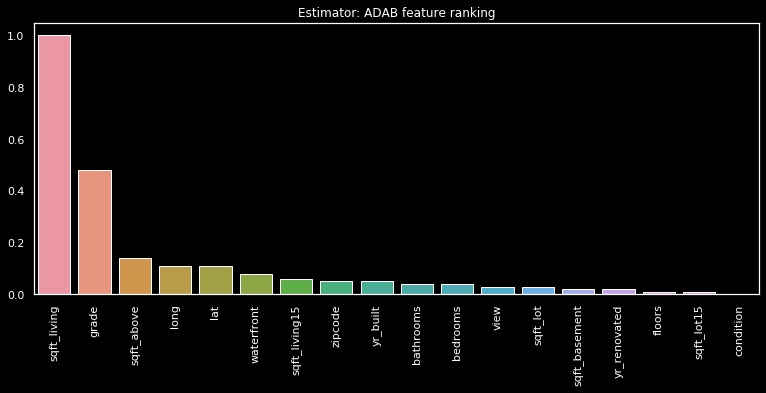

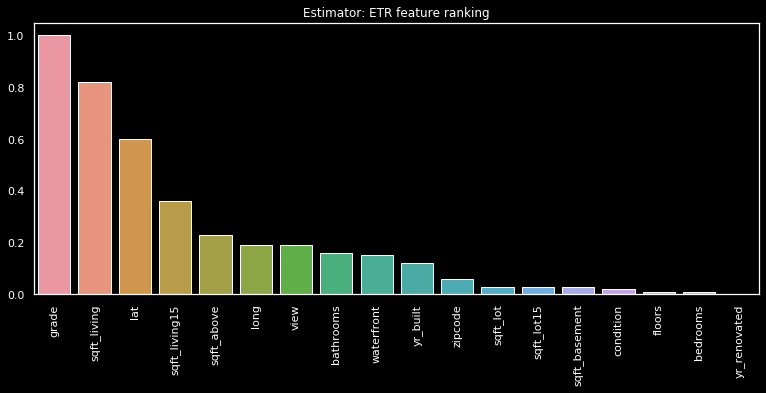

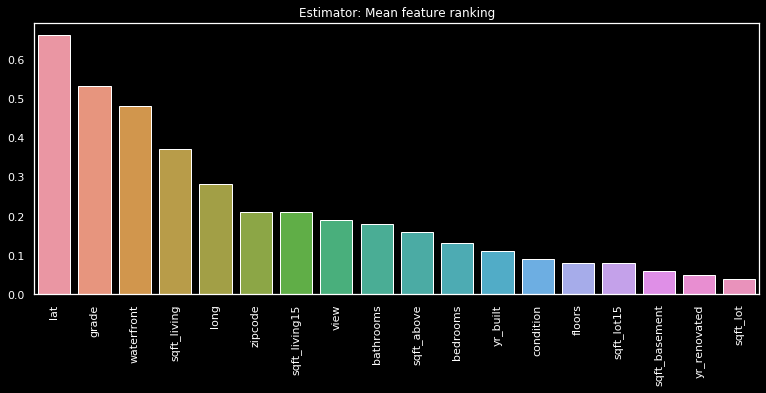

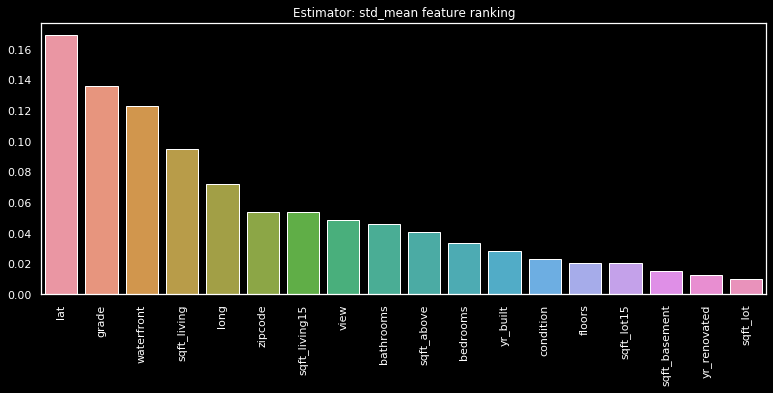

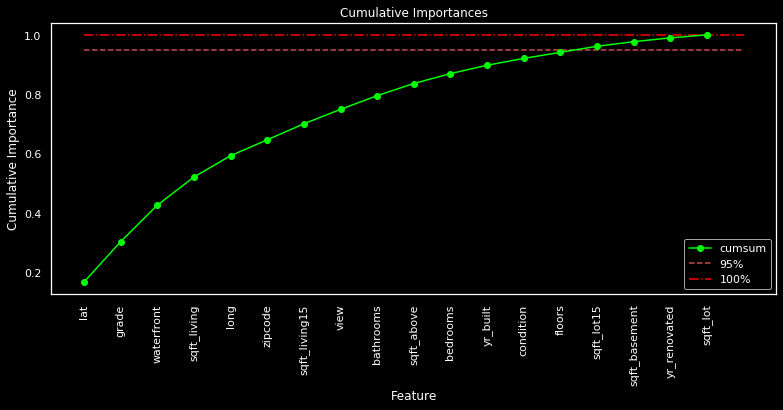

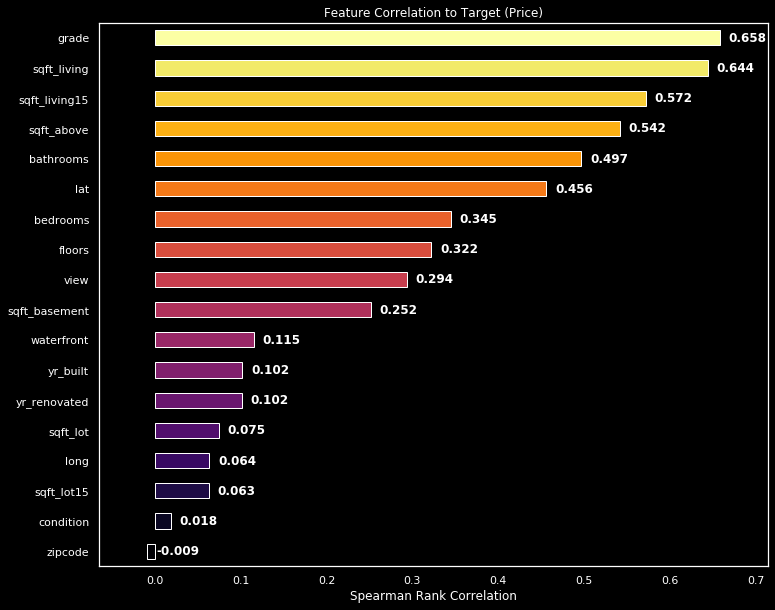

In [15]:
for rank, r in ranks_df.iteritems():
    plt.figure(figsize=(13,5))
    sns.barplot(ranks_df[rank].sort_values(ascending=False).index, ranks_df[rank].sort_values(ascending=False).values)
    plt.title(f'Estimator: {rank} feature ranking')
    plt.xticks(rotation=90)
    plt.grid(False)
    plt.show();
    
# Make a line graph
plt.figure(figsize=(13,5))
plt.plot(x_values, cumulative_importances, 'ro-', color='lime', label='cumsum')
# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed', label='95%')
# Draw line at 98% of importance retained
plt.hlines(y = 1.0, xmin=0, xmax=len(sorted_importances), color = 'red', linestyles = 'dashdot', label='100%')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Feature'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances')
plt.grid(False)
plt.legend(loc='lower right')
plt.show();

fig, axes = plt.subplots(figsize=(13, 10)) 
correl = (house
          .apply(lambda x: spearmanr(x, Y))
          .apply(pd.Series, index=['r', 'pval']))
colors = cm.inferno(np.linspace(0, 1, len(correl)))
correl.r.sort_values().plot.barh(colors=colors, figsize=(12, 10))
for i, v in enumerate(correl.r.sort_values()):
        axes.text(v + 0.01, i, str(round(v,3)), color='white', fontweight='bold', fontsize=12, va='center')
plt.title('Feature Correlation to Target (Price)')
plt.xlabel('Spearman Rank Correlation')
plt.margins(x=0.085)
plt.grid(False)
plt.show();

In [16]:
# Find number of features for cumulative importance of 99%
num_rdc1 = np.where(cumulative_importances > 0.99)[0][0] + 1
print(f'Number of features for 99% importance is {num_rdc1} out of {len(cumulative_importances)} features') 

Number of features for 99% importance is 18 out of 18 features


In [17]:
# Find number of features for cumulative importance of 95%
num_rdc2 = np.where(cumulative_importances > 0.95)[0][0] + 1
print(f'Number of features for 95% importance is {num_rdc2} out of {len(cumulative_importances)} features') 

Number of features for 95% importance is 15 out of 18 features


In [18]:
X0 = house.copy()

In [19]:
important_feature_names1 = ranks_df.std_mean.sort_values(ascending=False)[0:num_rdc1].index
X1 = house[important_feature_names1]
X1.columns

Index(['lat', 'grade', 'waterfront', 'sqft_living', 'long', 'zipcode',
       'sqft_living15', 'view', 'bathrooms', 'sqft_above', 'bedrooms',
       'yr_built', 'condition', 'floors', 'sqft_lot15', 'sqft_basement',
       'yr_renovated', 'sqft_lot'],
      dtype='object')

In [20]:
important_feature_names2 = ranks_df.std_mean.sort_values(ascending=False)[0:num_rdc2].index
X2 = house[important_feature_names2]
X2.columns

Index(['lat', 'grade', 'waterfront', 'sqft_living', 'long', 'zipcode',
       'sqft_living15', 'view', 'bathrooms', 'sqft_above', 'bedrooms',
       'yr_built', 'condition', 'floors', 'sqft_lot15'],
      dtype='object')

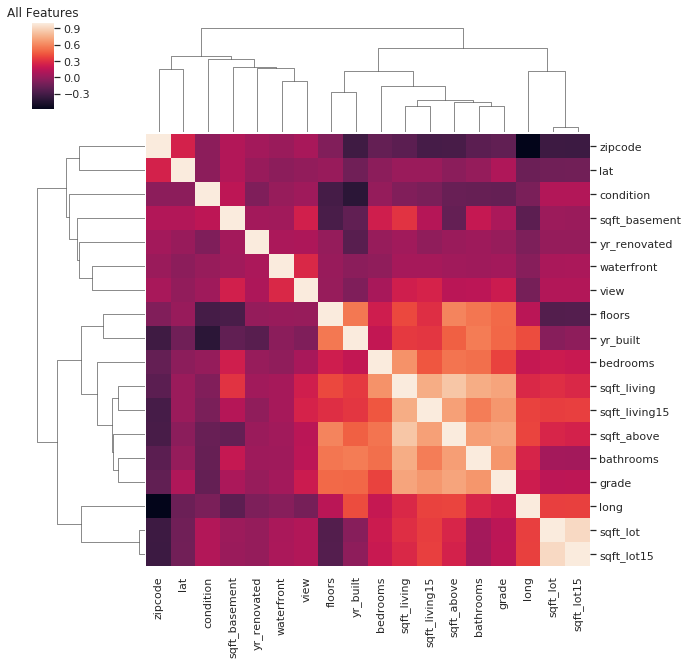

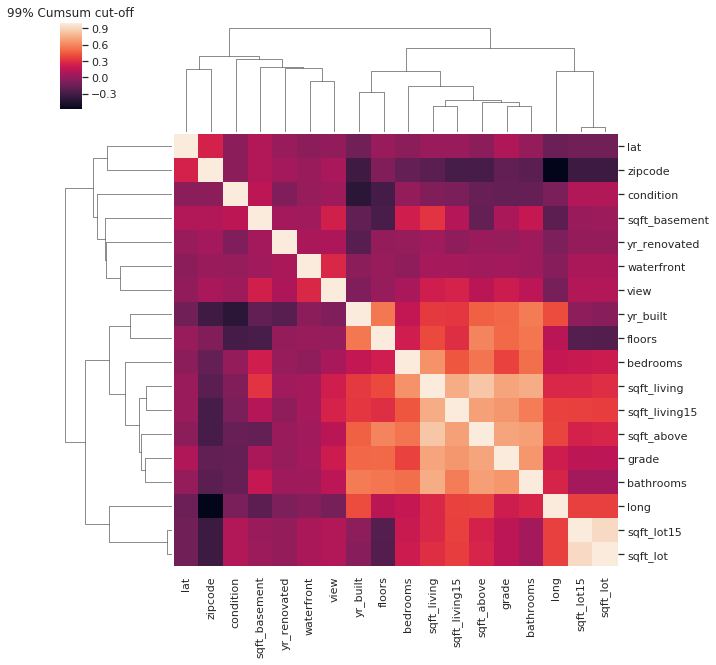

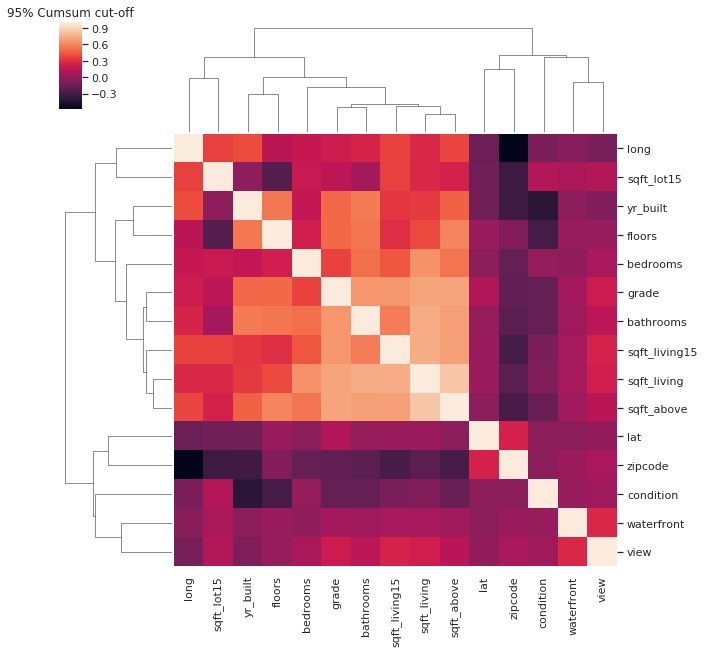

In [21]:
sns.set(style="darkgrid", color_codes=True)

g = sns.clustermap(X0.corr(method='spearman'))
ax = g.ax_heatmap
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('All Features')
plt.show();

sns.set(style="darkgrid", color_codes=True)
g = sns.clustermap(X1.corr(method='spearman'))
ax = g.ax_heatmap
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('99% Cumsum cut-off')
plt.show();

g = sns.clustermap(X2.corr(method='spearman'))
ax = g.ax_heatmap
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('95% Cumsum cut-off')
plt.show();

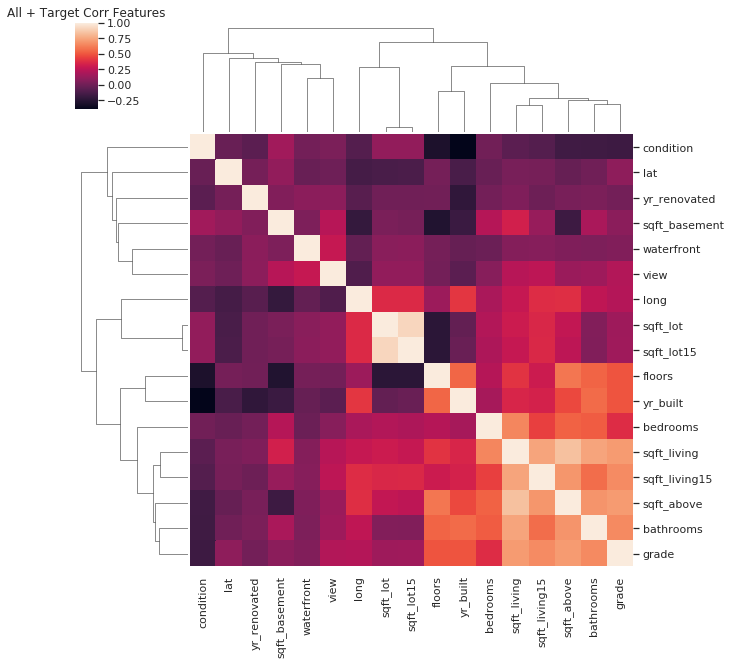

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')



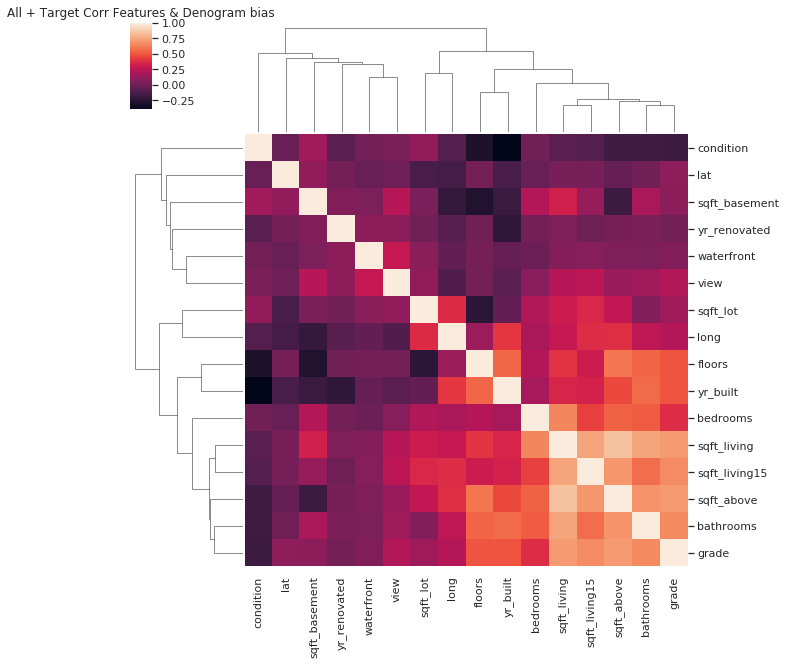

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15'],
      dtype='object')


In [22]:
X3 = house.drop(['zipcode'], axis=1)
X4 = house.drop(['zipcode', 'sqft_lot15'], axis=1)

sns.set(style="darkgrid", color_codes=True)
g = sns.clustermap(X3.corr(method='spearman'))
ax = g.ax_heatmap
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('All + Target Corr Features')
plt.show();
print(X3.columns)
print()

g = sns.clustermap(X4.corr(method='spearman'))
ax = g.ax_heatmap
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('All + Target Corr Features & Denogram bias')
plt.show();
print(X4.columns)